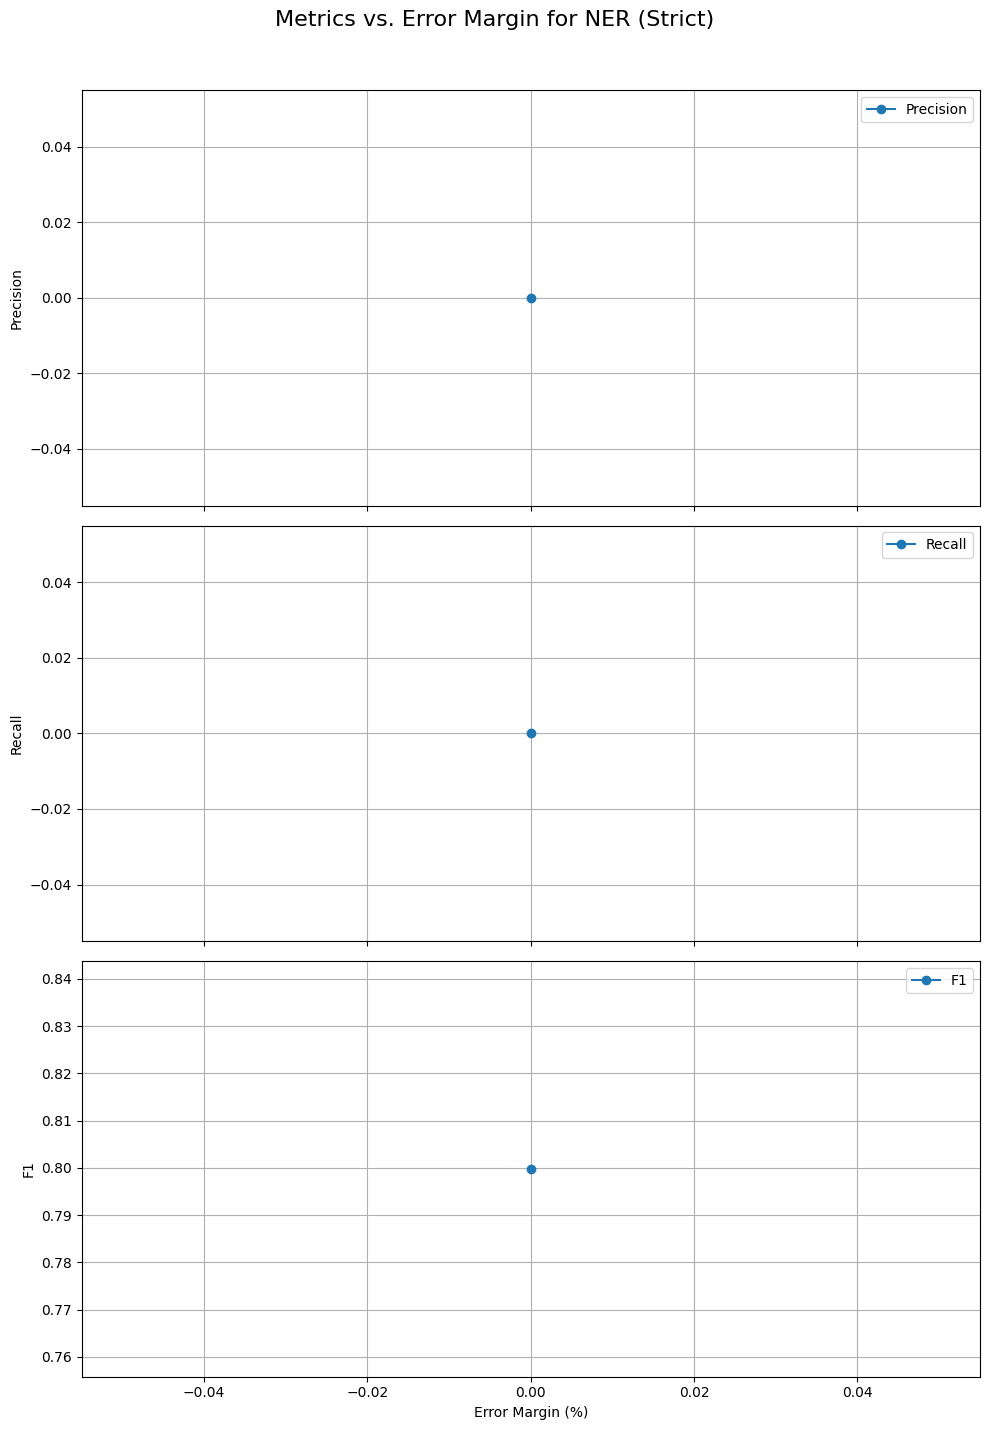

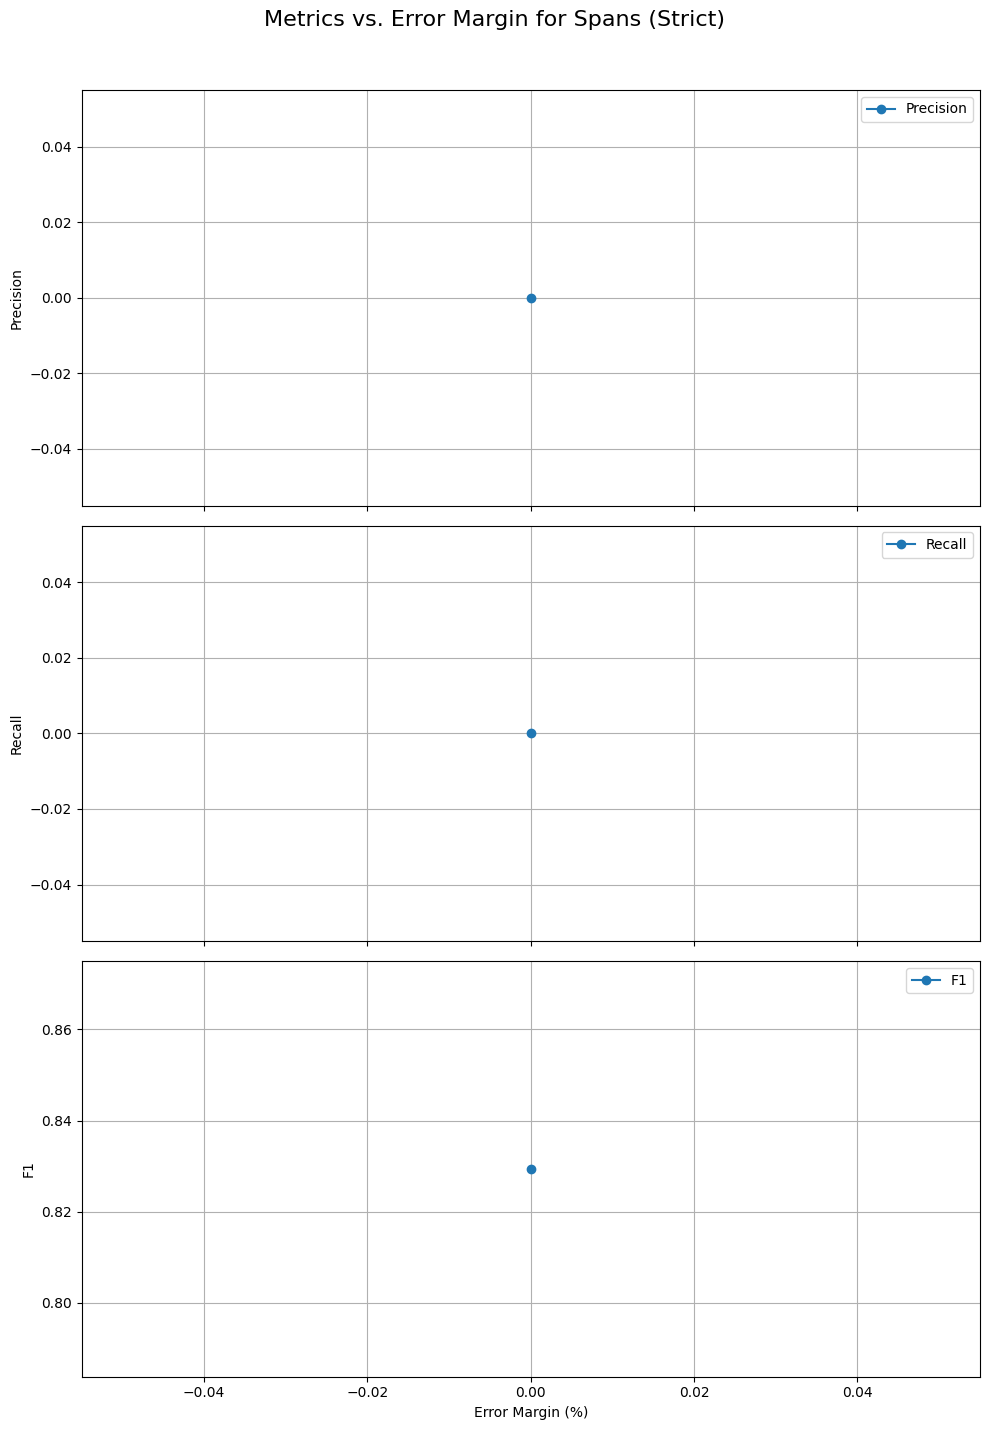

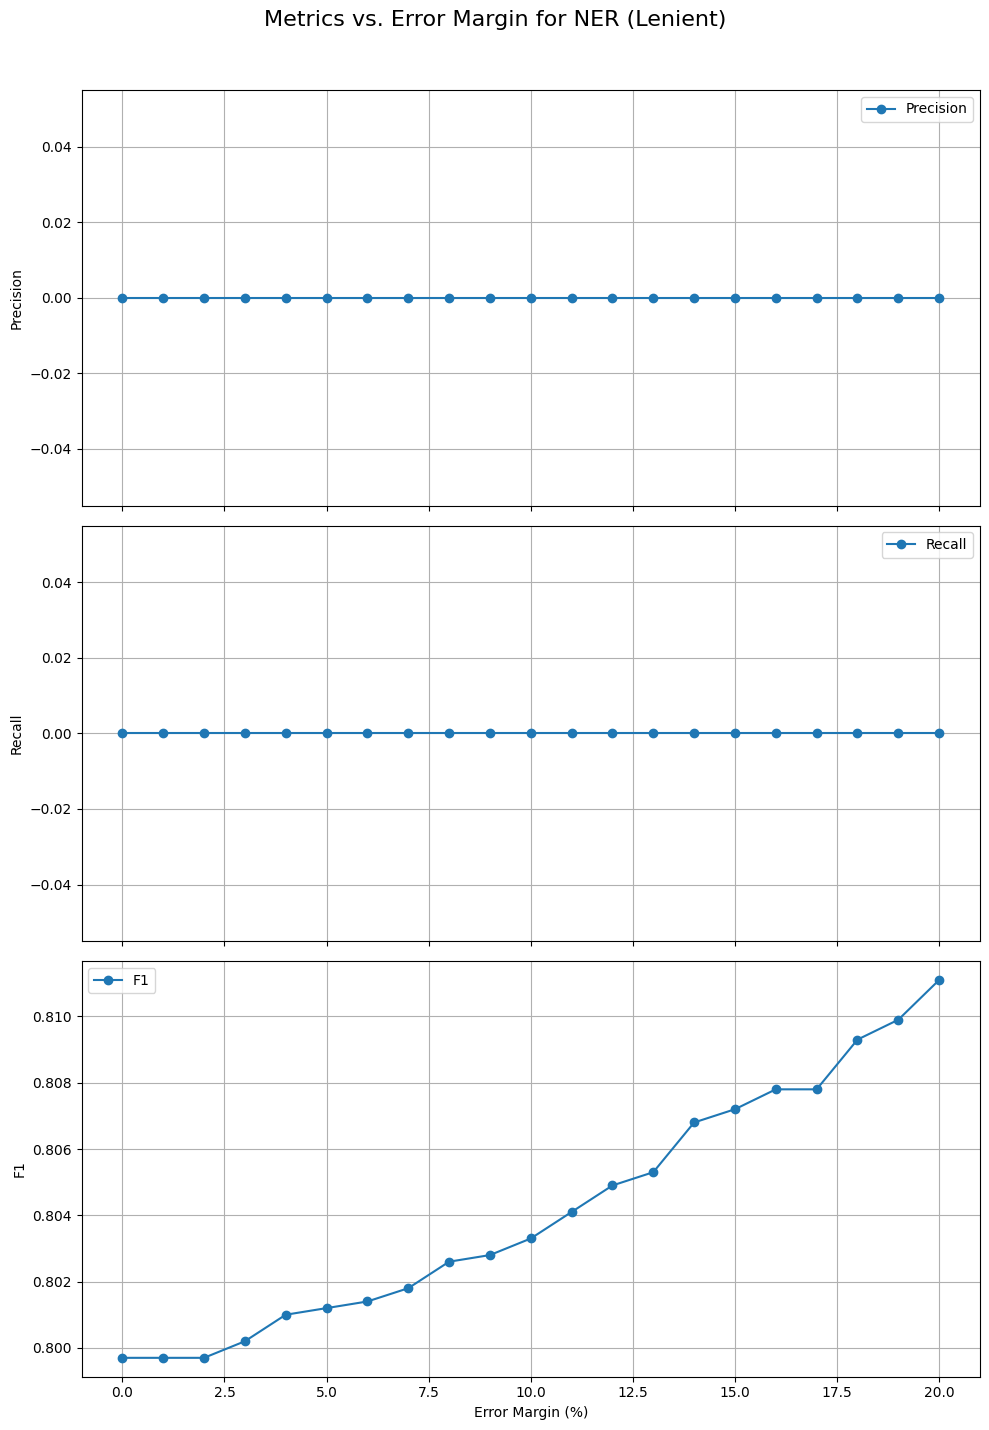

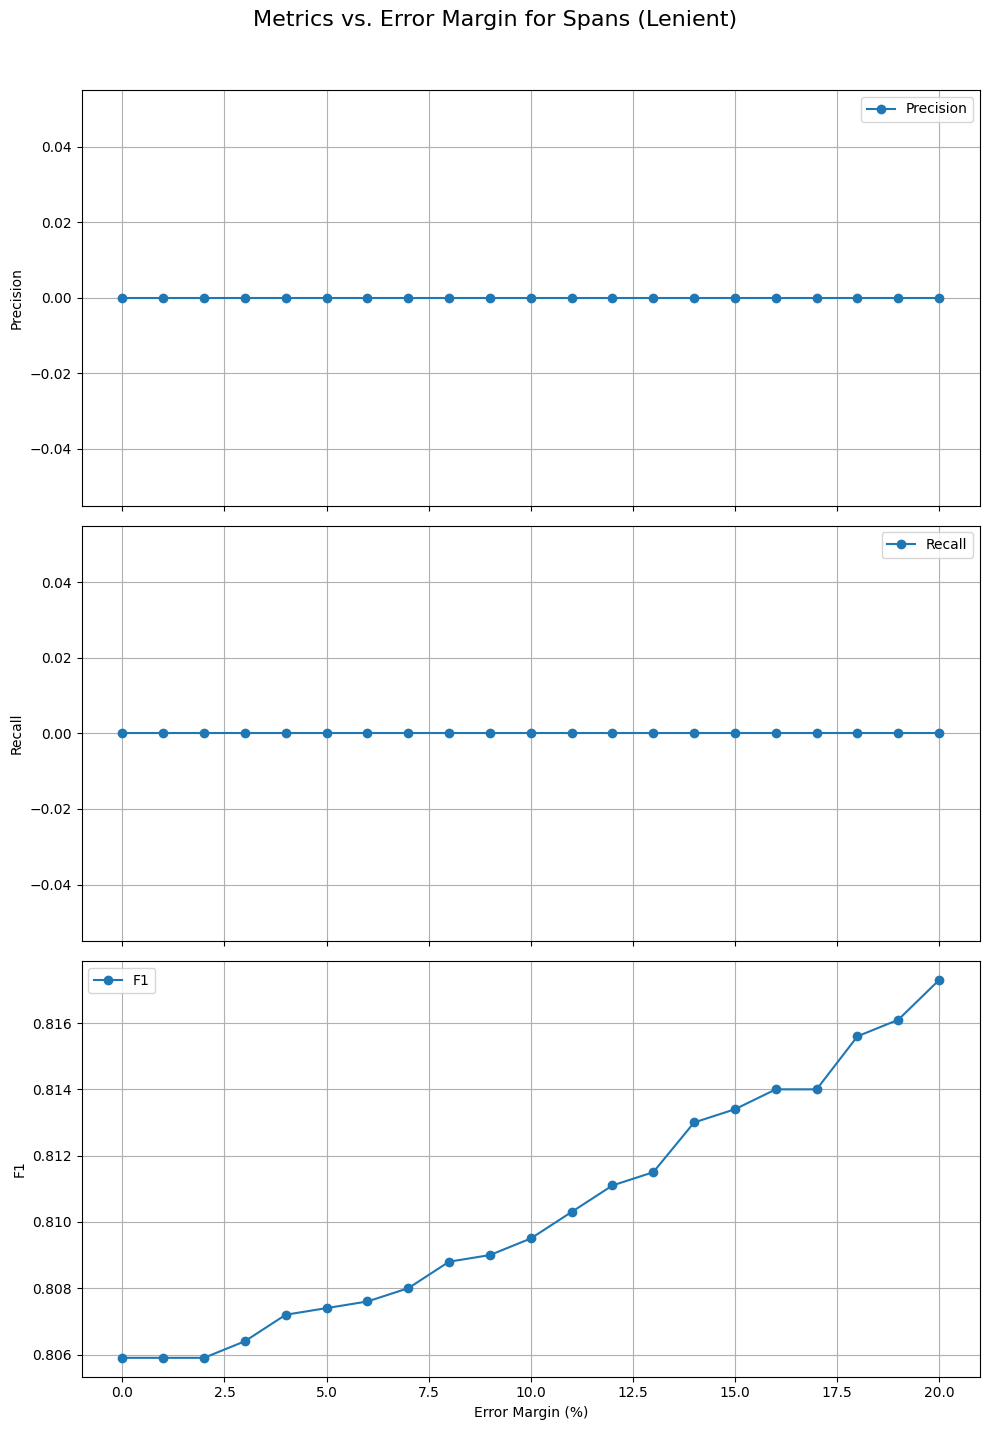


--- Summary of Strict Metrics ---
NER Strict: P=0.0000, R=0.0000, F1=0.7998
Spans Strict: P=0.0000, R=0.0000, F1=0.8294
